In [1]:
#필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as pylab
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float

In [2]:
import cv2
import os

filenames = os.listdir("./data-iris_eye/iris/") 

In [3]:
dataset = []
labels = []
#trainset, testset 나누기 
for filename in filenames[:-1]:
    label = filename[5:8]
    image = cv2.imread("./data-iris_eye/iris/"+filename, 0)
    image = np.array(image).reshape((-1))
    dataset.append(image)
    labels.append(int(label))
#id = 190 data per id = 10
#faces = np.array(train_faces)
train_dataset = np.array(dataset[:1330]) #id 1~133
train_labels = np.array(labels[:1330])
test_dataset = np.array(dataset[1330:]) #id 134~190
test_labels = np.array(labels[1330:])

(1330, 7232)


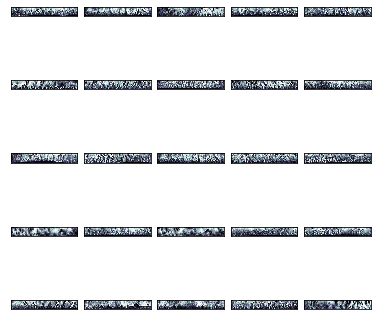

In [4]:
print(train_dataset.shape) # (1330, 7232) → (32×226=7,232) 화소의 1330개의 트레이닝셋 얼굴 영상
fig = pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

# 25개 랜덤 얼굴 영상 표시
j=1
np.random.seed(0)
for i in np.random.choice(range(train_dataset.shape[0]), 25):
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[])
    face = np.reshape(train_dataset[i,:],(32,-1))
    ax.imshow(face, cmap='bone', interpolation='nearest')
    j += 1
pylab.show()

(1330, 1330)


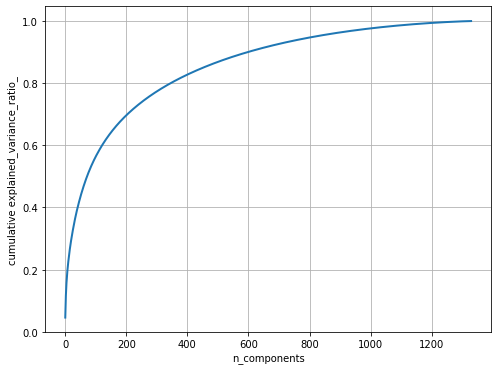

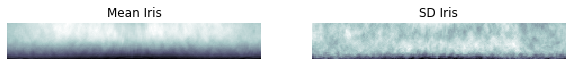

In [5]:
#주성분의 variation을 살펴보기
#주성분별 variation을 누적합해서 차트 그림

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#학습 데이터를 대상으로 PCA()를 실행시킬 것이므로, 1330을 적용
#n_components must be between 0 and min(n_samples, n_features)=1330 with svd_solver='full'
n_comp = 1330

#평균 및 분산 관련 계산은 StandardScaler()로 계산
#주성분 찾는 것은 PCA()로 계산
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_comp))])

#학습 데이터 train_dataset 적용해 실행
#PCA()경우에는 .fit과 .transform 모두를 실행 시키는 것임
#.fit은 주성분을 찾는 것
#.transform은 해당 데이터를 주성분 상으로 투영시키는 것
train_iris_proj = pipeline.fit_transform(train_dataset)
print(train_iris_proj.shape) # (1750, 400)

mean_face = np.reshape(pipeline.named_steps['scaling'].mean_, (32,226))
# 각 홍채의 화소/인덱스별로 평균 계산
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (32,226))
#얼굴의 차이값(각 홍채 화소  - 해당 화소/인덱스의 평균) 


#print(pipeline.named_steps['pca'].explained_variance_ratio_)
pylab.figure(figsize=(8, 6))
variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_
pylab.plot(np.cumsum(variance_ratio), linewidth=2)
pylab.grid(), pylab.axis('tight'), pylab.xlabel('n_components')
pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show()

#평균헝채 MeanLris(각 화소의 평균값)와 분산이 반영된 정보 SDIris(각 화소의 분산) 출력
pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_face, cmap='bone')
pylab.axis('off'), pylab.title('Mean Iris')
pylab.subplot(122), pylab.imshow(sd_face, cmap='bone')
pylab.axis('off'), pylab.title('SD Iris')
pylab.show()

In [6]:

#분산 비율이 85퍼센트일때
pca = PCA(0.85)

#학습 데이터 faces_train에 대해 PCA() 실행
pca.fit(train_dataset) 

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
#9
#pca = PCA(0.9)로 찾은 적정수 확인
#여기서는 이미 PCA()는 학습데이터를 이용해 실행되었고, 그 주성분 수만 확인함
print(pca.n_components)  #언더바 없는 것은 바로 위에서 설정한 variance ratio 누적합 값 0.85을 나타냄
print(pca.n_components_) #언더바 있는 것은 n_components 일 때의 적용된 주성분 수

0.85
448


(1330, 448)


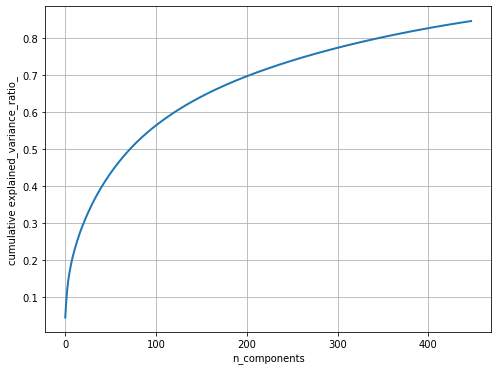

[0.04567835 0.04174985 0.02989846 0.02323784 0.01702274 0.01437103
 0.01331116 0.01191906 0.0106077  0.00968317 0.00896281 0.00849108
 0.00822544 0.00809144 0.00778418 0.00747575 0.00719788 0.00694038
 0.00642658 0.00623595 0.00612565 0.00598358 0.0058896  0.00577679
 0.00553245 0.00544051 0.00533625 0.00526993 0.00515664 0.00508151
 0.00499567 0.00486036 0.0047948  0.00464418 0.00453239 0.00440975
 0.00438745 0.00435858 0.00430208 0.00411469 0.00405332 0.00401035
 0.00394232 0.00386331 0.00379745 0.0037555  0.0037219  0.00364838
 0.00361529 0.00356002 0.00353283 0.00345479 0.00338949 0.00333124
 0.00330401 0.00327229 0.00322137 0.00318429 0.00317512 0.003081
 0.00302946 0.00302245 0.00298893 0.00297936 0.00288994 0.00286907
 0.00281959 0.00279961 0.0027572  0.00273052 0.00271019 0.00269196
 0.00261884 0.00259899 0.00254835 0.00253218 0.00248208 0.00245082
 0.00242474 0.00240469 0.00237231 0.0023457  0.00232328 0.00229242
 0.0022676  0.00223143 0.00221063 0.00220917 0.0021613  0.002154

In [8]:
#주성분 개수: 448

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_comp = 448    #적정 주성분 수인 448을 주성분 개수로 설정하고 시작
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_comp))])
train_iris_proj = pipeline.fit_transform(train_dataset)
print(train_iris_proj.shape) # (1330, 594)

mean_iris = np.reshape(pipeline.named_steps['scaling'].mean_, (32,226))
sd_iris = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (32,226))

train_iris_proj.shape
#그래프 다시 출력
pylab.figure(figsize=(8, 6))
variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_
pylab.plot(np.cumsum(variance_ratio), linewidth=2)
pylab.grid(), pylab.axis('tight'), pylab.xlabel('n_components')
pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show()

variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_
print(variance_ratio)
#각 주성분 당 분산 비율 출력 

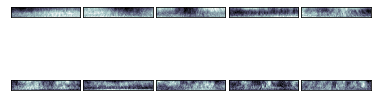

(448, 7232)


array([0.01031297, 0.00996148, 0.01023492, ..., 0.01091172, 0.0110125 ,
       0.0112738 ])

In [9]:
#고유 홍채

#위 셀에서 고유얼굴 계산함
#계산된 결과를 가지고 표시

fig = pylab.figure(figsize=(5,2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 첫 10개 고유홍채 표시
#i = 1~448
for i in range(10):
    face = np.reshape(pipeline.named_steps['pca'].components_[i, :], (32,226))
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(face, cmap='bone')
pylab.show()
print(pipeline.named_steps['pca'].components_.shape) #(32,226)
pipeline.named_steps['pca'].components_[1, :]
#고유얼굴 = 고유벡터 = pca.components_ = u #보통 u로 표기

In [10]:
#홍채 재구성 - 32×226 크기
train_iris_inv_proj = pipeline.named_steps['pca'].inverse_transform(train_iris_proj)
train_iris_inv_proj = np.reshape(train_iris_inv_proj, (1330, 32, 226))

# 56×46 차원의 영상 1225개 형태 변환
fig = pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

j = 1
np.random.seed(0) # 매번 같은 임의값 지정 위해
for i in np.random.choice(range(train_dataset.shape[0]), 5):
    reconst_iris = mean_iris + sd_iris * train_iris_inv_proj[i, :]
    ax = fig.add_subplot(1, 5, j, xticks=[], yticks=[])
    ax.imshow(reconst_iris, cmap='bone', interpolation='nearest')
    j += 1

pylab.show()
#10개의 특징 벡터 출력
print(train_iris_proj.shape)
pipeline.named_steps['pca'].components_[:10, :]

(1330, 448)


array([[-0.01930804, -0.01965044, -0.01978145, ...,  0.01672001,
         0.01692737,  0.01705533],
       [ 0.01031297,  0.00996148,  0.01023492, ...,  0.01091172,
         0.0110125 ,  0.0112738 ],
       [ 0.01707867,  0.01537011,  0.01557313, ...,  0.00291542,
         0.00627361,  0.0074749 ],
       ...,
       [ 0.01271549,  0.01568924,  0.01530192, ..., -0.00896466,
        -0.01085363, -0.00989468],
       [-0.00547451, -0.00794779, -0.00693418, ..., -0.01942527,
        -0.01587007, -0.01596951],
       [ 0.0108465 ,  0.01542339,  0.01470418, ..., -0.00531549,
        -0.00564109, -0.00584202]])

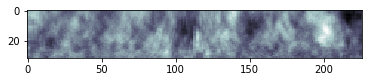

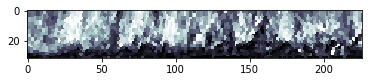

In [11]:
import matplotlib.pyplot as plt


iris = pipeline.named_steps['pca'].components_*0
#14번째 홍채 주성분을 반영해서 재건
for i in range(448):
    iris += pipeline.named_steps['pca'].components_[i, :]*train_iris_proj[14][i]

#재건한 홍채 출력
plt.figure()
plt.subplot(1, 1, 1)
plt.imshow(np.reshape(face, (32, 226)), cmap='bone')

#원본 이미지 출력
plt.figure()
plt.subplot(1, 1, 1)
plt.imshow(np.reshape(train_dataset[14], (32,226)), cmap='bone')

In [12]:
test_iris_proj = pipeline.fit_transform(test_dataset)
testdata_length = len(test_iris_proj)

print(testdata_length)
D = [[0]*testdata_length for _ in range(testdata_length)] #(560, 560)

560


In [13]:
#각 data간 거리 데이터 저장
for i in range(testdata_length):
    for j in range(testdata_length):
        if i == j:
            D[i][j] = 1000
        else:
            d = round(np.sqrt(sum((train_iris_proj[i]-train_iris_proj[j])**2)), 2)              
            D[i][j] = d
#자기 자신은 0이 아닌 1000으로 설정

In [14]:
print(len(D)) #560

560


In [15]:
#거리가 가장 작은 얼굴간은 동일 ID로 취급하겠다~ 방식. (identification)
identification = [-1 for _ in range(testdata_length)]
# 거리가 가장 가까운 것을 담음
for i in range(testdata_length):
    min = 1000
    index = i
    for j in range(testdata_length):
        if D[i][j] < min:
            min = D[i][j]
            index = j
    identification[i] = (index//10)

In [16]:
print(identification)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 47, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 12, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27,

In [17]:
#identification에 각 행과 매칭되는 id값이 저장되어 있음.
count = 0

for i in range(len(identification)//10): #한 id에 대해
    if identification[i*10] == i:#자신과 매칭
        count += 1
        

identification2_accuracy = (count/(len(identification)//10))*100
print(identification2_accuracy)
#100%의 정확도

100.0


In [18]:
# 3-2. 상위 쿼리 얼굴 제외한 동일 아이디의 샘플 개수를 이용한 FAR, FRR
# FAR(오인식) = 타인ID수/매칭 수(4)
# FRR(오거부) = 본인ID수/거부 수(4*(104) = 416)
#거리가 가장 작은 얼굴 5개(각 아이디당 샘플 개수)는 동일 ID로 취급하겠다~ 방식

count = 0 #본인이 본인으로 인식 된 경우
for i in range(len(D)//10):
    i_face = [D[i*10+1][i*10], D[i*10+2][i*10], D[i*10+3][i*10], D[i*10+4][i*10],
             D[i*10+5][i*10], D[i*10+6][i*10], D[i*10+7][i*10], D[i*10+8][i*10], D[i*10+9][i*10]]
    for d_i in i_face:
        if d_i in sorted(D[i*10])[:9]:
            count += 1

identification1_accuracy = count*100/(len(D)*9//10)
print("accuracy {}".format(identification1_accuracy))
#48%의 정확도
print("FAR {}".format(1-(count/(len(D)*9//10))))
print("FRR {}".format(((len(D)*9//10)-count)/(len(D)*(9*57)//10)))

accuracy 79.16666666666667
FAR 0.20833333333333337
FRR 0.003654970760233918


In [19]:
#일정 간격의 거리값을 차례로 결정임계치로 사용하기 위해 간격 정하기

D1 = sorted(np.reshape(D, (-1,1)))
print(len(D1)) #313600
for i in range(10): #17 92 97 100 103 106 109 111 114 119
    print(D1[31360*i])

313600
[16.59]
[92.85]
[97.5]
[100.91]
[103.79]
[106.41]
[108.99]
[111.77]
[114.89]
[119.28]


In [20]:
threshold = [15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165]

def FAR():
    FAR = []
    for T in threshold:
        a = T
        count = 0
        other = 0
        for i in range(len(D)//10):
            for j in range(len(D[i])):
                if D[i*10][j] <= a:#매칭되었을 경우
                    count += 1
                    if i*10 <= j < (i+1)*10: #다른사람 id인 결루
                        other += 1
        if count == 0:
            FAR.append(0.0)
            continue
        other = count - other
        FAR.append((other/count))
    return FAR

FAR = FAR()  

In [21]:
def FRR():
    FRR = []
    for T in threshold:
        a = T
        count = 0
        target = 0
        for i in range(len(D)//10):
            for j in range(len(D[i])):
                if a <= D[i*10][j] < 1000: #거절되었을 경우
                    count += 1
                    if i*10 <= j < (i+1)*10:#자신의 id의 경우
                        target += 1
        if count == 0:
            FRR.append(0.0)
            continue
        FRR.append((target/count))
    return FRR

FRR = FRR()

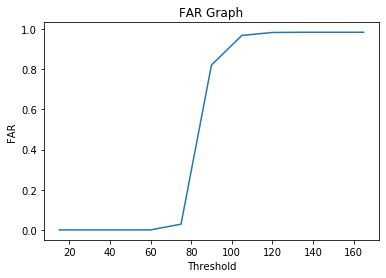

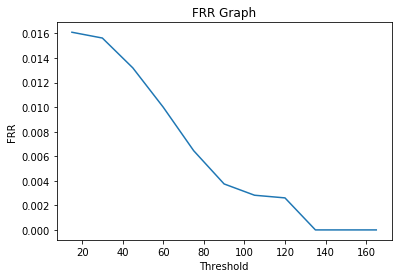

In [22]:
#x축은 각 임계치, y축은 각각 FAR, FRR
#그래프 출력
pylab.plot(threshold, FAR)
pylab.xlabel('Threshold')
pylab.ylabel('FAR')
pylab.title('FAR Graph')
pylab.show()

pylab.plot(threshold, FRR)
pylab.xlabel('Threshold')
pylab.ylabel('FRR')
pylab.title('FRR Graph')
pylab.show()